<a href="https://colab.research.google.com/github/julievera7/CoderDataScience/blob/main/ProyectoDSParteII%2BVera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Data Science
## Resumen de la Base de Datos Adult Census Income

La base de datos Adult Census Income, proveniente del repositorio UCI Machine Learning, disponbile en Kaggle, contiene información demográfica y socio-económica de aproximadamente 48,000 individuos en Estados Unidos, extraída del Censo de 1994.

El dataset cuenta con 15 atributos, incluyendo edad, nivel educativo, ocupación, estado civil, raza, género, horas trabajadas por semana y origen étnico. La variable objetivo, income, es una clasificación binaria con valores ">50K" y "<=50K". Algunos atributos tienen valores faltantes, como "workclass" y "occupation", lo que requiere estrategias de limpieza y manejo de datos.

Desde una perspectiva analítica, este conjunto de datos permite aplicar técnicas de preprocesamiento, análisis exploratorio de datos (EDA) y modelos de clasificación como árboles de decisión, estudios de correlación, entre otros.


## Dataset - Referencias

###US Census Data (Adult Income) - Kaggle

1.- Rows: ~48,000

2.- Columns: 15+

3.- Description: Contains demographic information, education, work class, occupation, and income brackets

4.- URL: https://www.kaggle.com/datasets/uciml/adult-census-income

**Datos sobre el dataset (*)**

Ronny Kohavi y Barry Becker (minería de datos y visualización, Silicon Graphics) extrajeron estos datos de la base de datos de la Oficina del Censo de 1994. Se extrajo un conjunto de registros razonablemente limpios utilizando las siguientes condiciones: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0))

**Descripción de fnlwgt (peso final)**

Los pesos de los archivos de la Encuesta de población actual (CPS) se controlan con estimaciones independientes de la población civil no institucional de los EE. UU. Estos son preparados mensualmente para nosotros por la División de población aquí en la Oficina del Censo. Utilizamos 3 conjuntos de controles. Estos son:

1.- Una estimación de una sola celda de la población de 16 años o más para cada estado.

2.- Controles de origen hispano por edad y sexo.

3.- Controles por raza, edad y sexo.

(*) Tomado de https://www.kaggle.com/datasets/uciml/adult-census-income/data

*Elementos del dataset*

||Columna	|| Descripción	 || Tipo de variable ||

|| 1.- age ||	Edad del individuo. ||	Numérica continua ||

|| 2.- workclass ||	Tipo de empleador || Categórica nominal ||

|| 3.- fnlwgt ||	Peso de la muestra (factor estadístico). ||	Numérica continua ||

|| 4.- education	|| Nivel de educación alcanzado.	|| Categórica ordinal ||

|| 5.- education-num ||	Nivel educativo codificado numéricamente.	|| Numérica discreta ||

|| 6.- marital-status ||	Estado civil. ||	Categórica nominal ||

|| 7.- occupation ||	Ocupación laboral. ||	Categórica nominal ||

|| 8.- relationship ||	Relación familiar dentro del hogar. ||	Categórica nominal ||

|| 9.- race ||	Raza declarada. ||	Categórica nominal ||

|| 10.- sex ||	Sexo (Male/Female).	|| Categórica nominal ||

|| 11.- capital-gain ||	Ganancia de capital. ||	Numérica continua ||

|| 12.- capital-loss ||	Pérdida de capital. ||	Numérica continua ||

||13.- hours-per-week ||	Horas trabajadas por semana. ||	Numérica continua ||

||14.- native-country ||	País de origen. ||	Categórica nominal ||

||15.- income ||	Objetivo: ingresos <=50K o >50K. ||	Categórica binaria ||

In [1]:
import pandas as pd

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/julievera7/CoderDataScience/refs/heads/main/adult.csv"

# Cargar el dataset en un DataFrame
data = pd.read_csv(url, header=None, na_values="?")

# Cambiar los nombres de las columnas
data.columns = ["edad", "clasetrabajadora", "fnlwgt", "educacion", "educacion_num", "estadocivil", "ocupacion", "relacion", "raza", "sexo", "capital_gain", "capital_loss", "horas_por_semana", "pais_origen", "ingreso"]
#Tenia un error, dado que tenia un registro string


print("Número de registros: " + str(len(data)))


Número de registros: 32562


## Limpieza de datos

In [2]:
#En el dataset, los valores ausentes
print(" \nAntes de eliminar los datos ausentes:\n ")

print(data.isnull().sum())

#Eliminar los datos ausentes

data.dropna(inplace=True)

#Verificar de vuelta

print(" \nLuego de eliminar los datos ausentes:\n ")

print(data.isnull().sum())

print("Número de registros: " + str(len(data)))

 
Antes de eliminar los datos ausentes:
 
edad                   0
clasetrabajadora    1836
fnlwgt                 0
educacion              0
educacion_num          0
estadocivil            0
ocupacion           1843
relacion               0
raza                   0
sexo                   0
capital_gain           0
capital_loss           0
horas_por_semana       0
pais_origen          583
ingreso                0
dtype: int64
 
Luego de eliminar los datos ausentes:
 
edad                0
clasetrabajadora    0
fnlwgt              0
educacion           0
educacion_num       0
estadocivil         0
ocupacion           0
relacion            0
raza                0
sexo                0
capital_gain        0
capital_loss        0
horas_por_semana    0
pais_origen         0
ingreso             0
dtype: int64
Número de registros: 30163


## Relación entre ingreso y educación - graficos

### Grafico de caja Distribución de edad segun nivel educativo e ingreso.




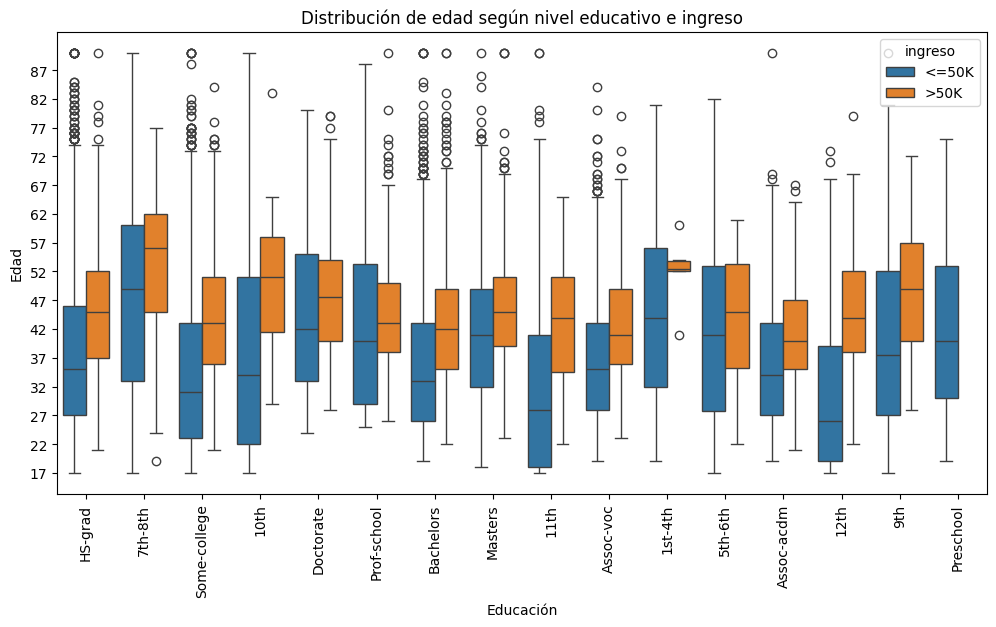

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="educacion", y="edad", hue="ingreso", data=data)
plt.xticks(rotation=90)
data['edad'] = pd.to_numeric(data['edad'], errors='coerce')
plt.yticks(ticks=np.arange(data["edad"].min(), data["edad"].max(), step=5))
plt.xlabel("Educación")
plt.ylabel("Edad")
plt.title("Distribución de edad según nivel educativo e ingreso")
plt.show()

## Hallazgos

Hay una relación entre la edad y el ingreso, independientemente del nivel educativo, una buena parte de las personas con edad adulta media entre 40-57 años, tienen ingresos mayores a 50K.

Sin embargo, aquellos con un nivel educativo superior a estudios de pregrado (Doctorate, Masters, Prof-scholl) tienen medianas de edad más elevenadas.

Respecto a los valores atípicos, se observa en los trabajadores que superan los 80 años.

Por otro lado, al comprar las cajas (rangos), vemos como hay una mayor variabilidad (más largos) en los trabajadores que ganan menos de 50K.



In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
mayores_50K = data[data["ingreso"] == ">50K"]["edad"]
menores_50K = data[data["ingreso"] == "<=50K"]["edad"]

media_mayores_50K = mayores_50K.mean()
mediana_mayores_50K = mayores_50K.median()

media_menores_50K = menores_50K.mean()
mediana_menores_50K = menores_50K.median()

print(f"Trabajadores con ingreso >50K: Media = {media_mayores_50K:.2f}, Mediana = {mediana_mayores_50K:.2f}")
print(f"Trabajadores con ingreso <=50K: Media = {media_menores_50K:.2f}, Mediana = {mediana_menores_50K:.2f}")


Trabajadores con ingreso >50K: Media = 43.96, Mediana = 43.00
Trabajadores con ingreso <=50K: Media = 36.61, Mediana = 34.00


##Relación entre ingresos y sexo

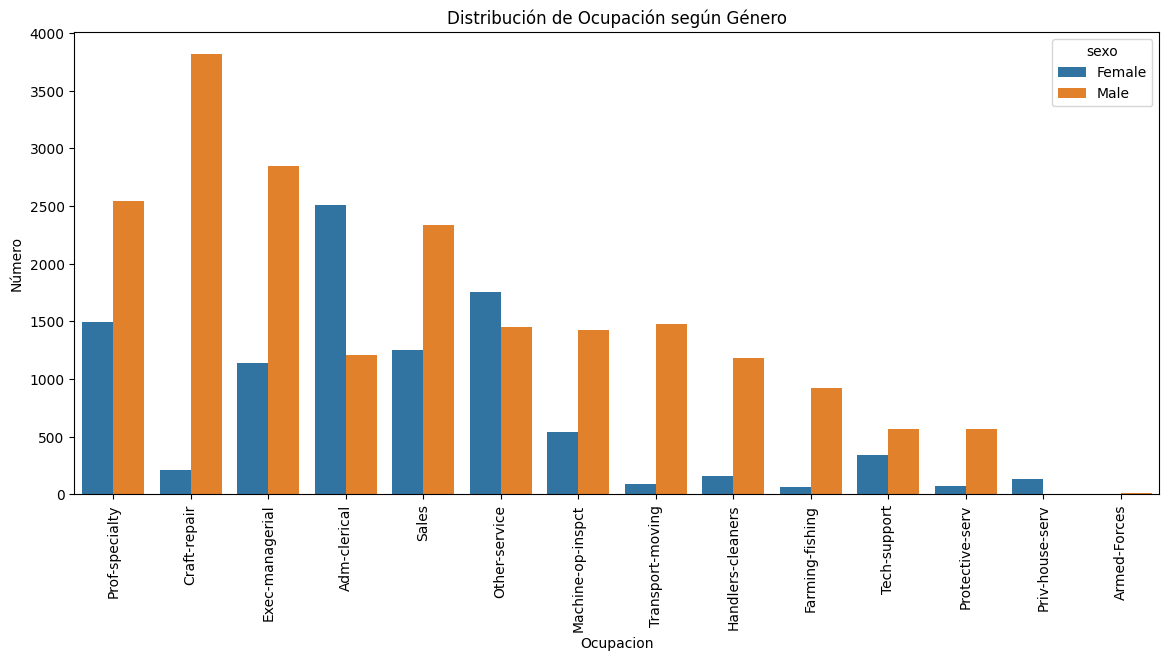

In [8]:
plt.figure(figsize=(14, 6))
sns.countplot(x='ocupacion', hue='sexo', data=data, order=data['ocupacion'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Ocupacion")
plt.ylabel("Número")
plt.title("Distribución de Ocupación según Género")
plt.show()

### Normalizar los datos

<ipython-input-6-33c34b04d941>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["educacion_num"] = data["educacion_num"].astype(int)


Matriz de correlación:
               sexo_num  ingreso_num      edad  educacion_num
sexo_num       1.000000     0.216699  0.081993       0.006157
ingreso_num    0.216699     1.000000  0.241998       0.335286
edad           0.081993     0.241998  1.000000       0.043526
educacion_num  0.006157     0.335286  0.043526       1.000000


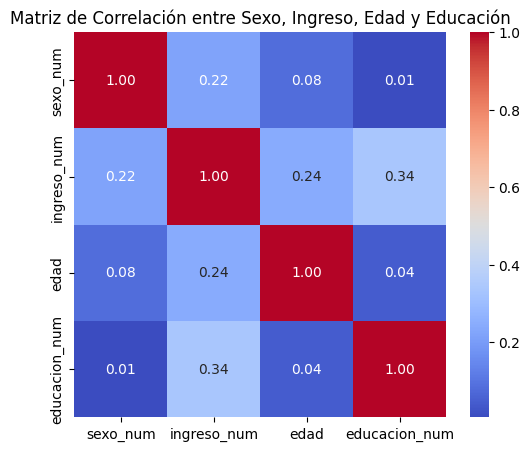

In [6]:
# Convertir variables categóricas a numéricas para la correlación
data["sexo_num"] = data["sexo"].map({"Male": 1, "Female": 0})  # 1 para hombres, 0 para mujeres
data["ingreso_num"] = data["ingreso"].map({">50K": 1, "<=50K": 0})  # 1 si gana más de 50K, 0 si gana menos
data = data[data["educacion_num"].apply(lambda x: str(x).isdigit())]
#Tenia un error, dado que tenia un registro string
data["educacion_num"] = data["educacion_num"].astype(int)

# Seleccionar las variables para la correlación
# Changed 'education.num' to 'educacion_num' to match the actual column name in the DataFrame.
variables_interes = data[["sexo_num", "ingreso_num", "edad", "educacion_num"]]
correlation_matrix = variables_interes.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Sexo, Ingreso, Edad y Educación")
plt.show()

## Análisis de Componentes Principales (PCA)



In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Separar objeto estudio
X = data.drop('ingreso', axis=1)

# Define 'y' before using it
y = LabelEncoder().fit_transform(data['ingreso']) # Define y here

# Codificar variables categóricas
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Escalar los datos para que todas las variables tengan la misma magnitud
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Convertir a DataFrame si lo necesitas
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Ver una muestra del resultado
print(X_scaled_df.head())
print("\n")
print("Número de registros: " + str(len(X_scaled_df)))

# Unir con la variable objetivo para revisar correlación
df_corr = X_encoded.copy()
df_corr['ingreso'] = y

# Calcular correlación
print("\n")
correlations = df_corr.corr()['ingreso'].sort_values(ascending=False)
print("Correlación con income:\n \n", correlations)


       edad  clasetrabajadora    fnlwgt  educacion  educacion_num  \
0  3.316630         -0.208955 -1.237283   0.174763      -0.439738   
1  1.184831         -0.208955 -1.156851  -1.399120      -2.400559   
2  0.195067         -0.208955  0.447677   1.224018      -0.047574   
3 -0.337883         -0.208955 -0.000687   0.174763      -0.439738   
4 -0.033340         -0.208955 -1.031069  -2.710688      -1.616231   

   estadocivil  ocupacion  relacion      raza      sexo  capital_gain  \
0     2.282969  -0.734545 -0.261249  0.385048 -1.443405     -0.263057   
1    -1.722396   0.009964  1.612215  0.385048 -1.443405     -0.263057   
2     1.615408   0.754473  0.987727  0.385048 -1.443405     -0.263057   
3    -1.722396   0.258134  1.612215  0.385048 -1.443405     -0.263057   
4     1.615408  -1.479055  1.612215  0.385048  0.692806     -0.263057   

   capital_loss  horas_por_semana  pais_origen  sexo_num  ingreso_num  
0      9.202672         -2.069446     0.264924 -1.443405    -0.575691  
1 

In [13]:
#Eliminar variable ingreso_num, dada la alta correlación y que afectará resultado del modelo

datatwo = data.drop(columns=['ingreso_num'])

#Luego se guardará el ingreso en Y.
# Separar objeto estudio
X = datatwo.drop('ingreso', axis=1)

# Codificar variables categóricas
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Escalar los datos para que todas las variables tengan la misma magnitud
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Convertir a DataFrame si lo necesitas
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Ver una muestra del resultado
print(X_scaled_df.head())
print("\n")
print("Número de registros: " + str(len(X_scaled_df)))

# Unir con la variable objetivo para revisar correlación
df_corr = X_encoded.copy()
df_corr['ingreso'] = y

# Calcular correlación
print("\n")
correlations = df_corr.corr()['ingreso'].sort_values(ascending=False)
print("Correlación con income:\n \n", correlations)

       edad  clasetrabajadora    fnlwgt  educacion  educacion_num  \
0  3.316630         -0.208955 -1.237283   0.174763      -0.439738   
1  1.184831         -0.208955 -1.156851  -1.399120      -2.400559   
2  0.195067         -0.208955  0.447677   1.224018      -0.047574   
3 -0.337883         -0.208955 -0.000687   0.174763      -0.439738   
4 -0.033340         -0.208955 -1.031069  -2.710688      -1.616231   

   estadocivil  ocupacion  relacion      raza      sexo  capital_gain  \
0     2.282969  -0.734545 -0.261249  0.385048 -1.443405     -0.263057   
1    -1.722396   0.009964  1.612215  0.385048 -1.443405     -0.263057   
2     1.615408   0.754473  0.987727  0.385048 -1.443405     -0.263057   
3    -1.722396   0.258134  1.612215  0.385048 -1.443405     -0.263057   
4     1.615408  -1.479055  1.612215  0.385048  0.692806     -0.263057   

   capital_loss  horas_por_semana  pais_origen  sexo_num  
0      9.202672         -2.069446     0.264924 -1.443405  
1      8.978789         -0.1

In [ ]:
#Se verifica que las variables tengan media 0 y desviación estandar 1.

print("Media de cada columna:")
print(np.round(X_scaled_df.mean(), 2))

print("\nDesviación estándar de cada columna:")
print(np.round(X_scaled_df.std(), 2))

Media de cada columna:
edad                0.0
clasetrabajadora   -0.0
fnlwgt             -0.0
educacion          -0.0
educacion_num      -0.0
estadocivil         0.0
ocupacion           0.0
relacion            0.0
raza               -0.0
sexo                0.0
capital_gain       -0.0
capital_loss        0.0
horas_por_semana    0.0
pais_origen         0.0
sexo_num            0.0
dtype: float64

Desviación estándar de cada columna:
edad                1.0
clasetrabajadora    1.0
fnlwgt              1.0
educacion           1.0
educacion_num       1.0
estadocivil         1.0
ocupacion           1.0
relacion            1.0
raza                1.0
sexo                1.0
capital_gain        1.0
capital_loss        1.0
horas_por_semana    1.0
pais_origen         1.0
sexo_num            1.0
dtype: float64


##Relación entre ingreso y educación - gráficos

###Modelo de Regresión Logística



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Target
y = LabelEncoder().fit_transform(data['ingreso'])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Modelo Regresión Logística
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print("🔍 Regresión Logística\n")



🔍 Regresión Logística



## Métricas para validar el modelo


In [ ]:
print("Precisión RF\n", accuracy_score(y_test, y_preds))
print("Matriz de confusión \n", confusion_matrix(y_test, y_preds))
print("Reporte de clasificación \n",classification_report(y_test, y_preds))


Precisión RF
 0.809050223769269
Matriz de confusión 
 [[4228  305]
 [ 847  653]]
Reporte de clasificación 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4533
           1       0.68      0.44      0.53      1500

    accuracy                           0.81      6033
   macro avg       0.76      0.68      0.71      6033
weighted avg       0.80      0.81      0.79      6033



Luego de eliminar la variable ingreso_num, que tenía una alta correlación con la variable objeto de estudio Ingreso, la precisión del modelo mejoró, es más realista, respecto al resultado anterior que fue de uno (1).

En este caso, el índice de precisión indica que el modelo acierta en 8 de cada 10 predicciones.

Se debe revisar el modelo, dado que la clase 1 (>50K), tiene un bajo nivel de precisión, donde se acierta 6,8 de cada 10 predicciones.

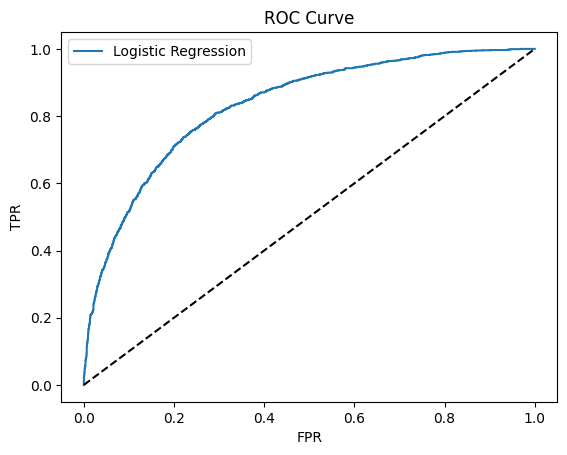

AUC: 0.8325750422825207


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades para clase positiva
y_proba = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

# AUC
print("AUC:", roc_auc_score(y_test, y_proba))

La curva ROC ilustra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a lo largo de distintos umbrales de clasificación. Un modelo eficaz presenta una curva que se aproxima a la esquina superior izquierda del gráfico, lo cual indica una alta sensibilidad y baja tasa de errores.